# Netflix Data Analysis

## Introduction
In this notebook, we will explore and analyze the Netflix dataset to uncover patterns and insights related to movies and TV shows. 
We'll clean the data, visualize key elements, and extract useful information using Python libraries such as Pandas, Matplotlib, Seaborn, and Plotly.

## AI Watch (Theory Section)


### What is Artificial Intelligence (AI)
Artificial Intelligence refers to the simulation of human intelligence in machines that are programmed to think, learn, and solve problems like humans.

### What is Machine Learning (ML)
Machine Learning is a branch of AI where computers learn from data to make decisions or predictions without being explicitly programmed.

### What is Data Pre-processing
Data pre-processing involves cleaning and transforming raw data into a suitable format for analysis or machine learning. It includes tasks like handling missing values, converting data types, and normalizing values.

### What is Descriptive Data Analysis
Descriptive data analysis summarizes and interprets data using statistical methods and visualizations to reveal patterns, trends, and relationships.

### AI in a Real-World Domain: Finance
In the finance sector, AI is used to detect fraudulent transactions, assess credit risk, automate trading, provide personalized financial advice, and analyze large volumes of market data to support investment decisions.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix.csv")

# Display the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Display the last 5 rows
df.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
# Show general info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Show number of rows and columns
df.shape


(8807, 12)

In [ ]:
# List of all column names
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Show the data types of each column
df.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# Total missing values per column
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine both into a single table
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data.sort_values(by='Percentage (%)', ascending=False)


,Missing Values,Percentage (%)
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064


In [ ]:
pip install missingno


  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


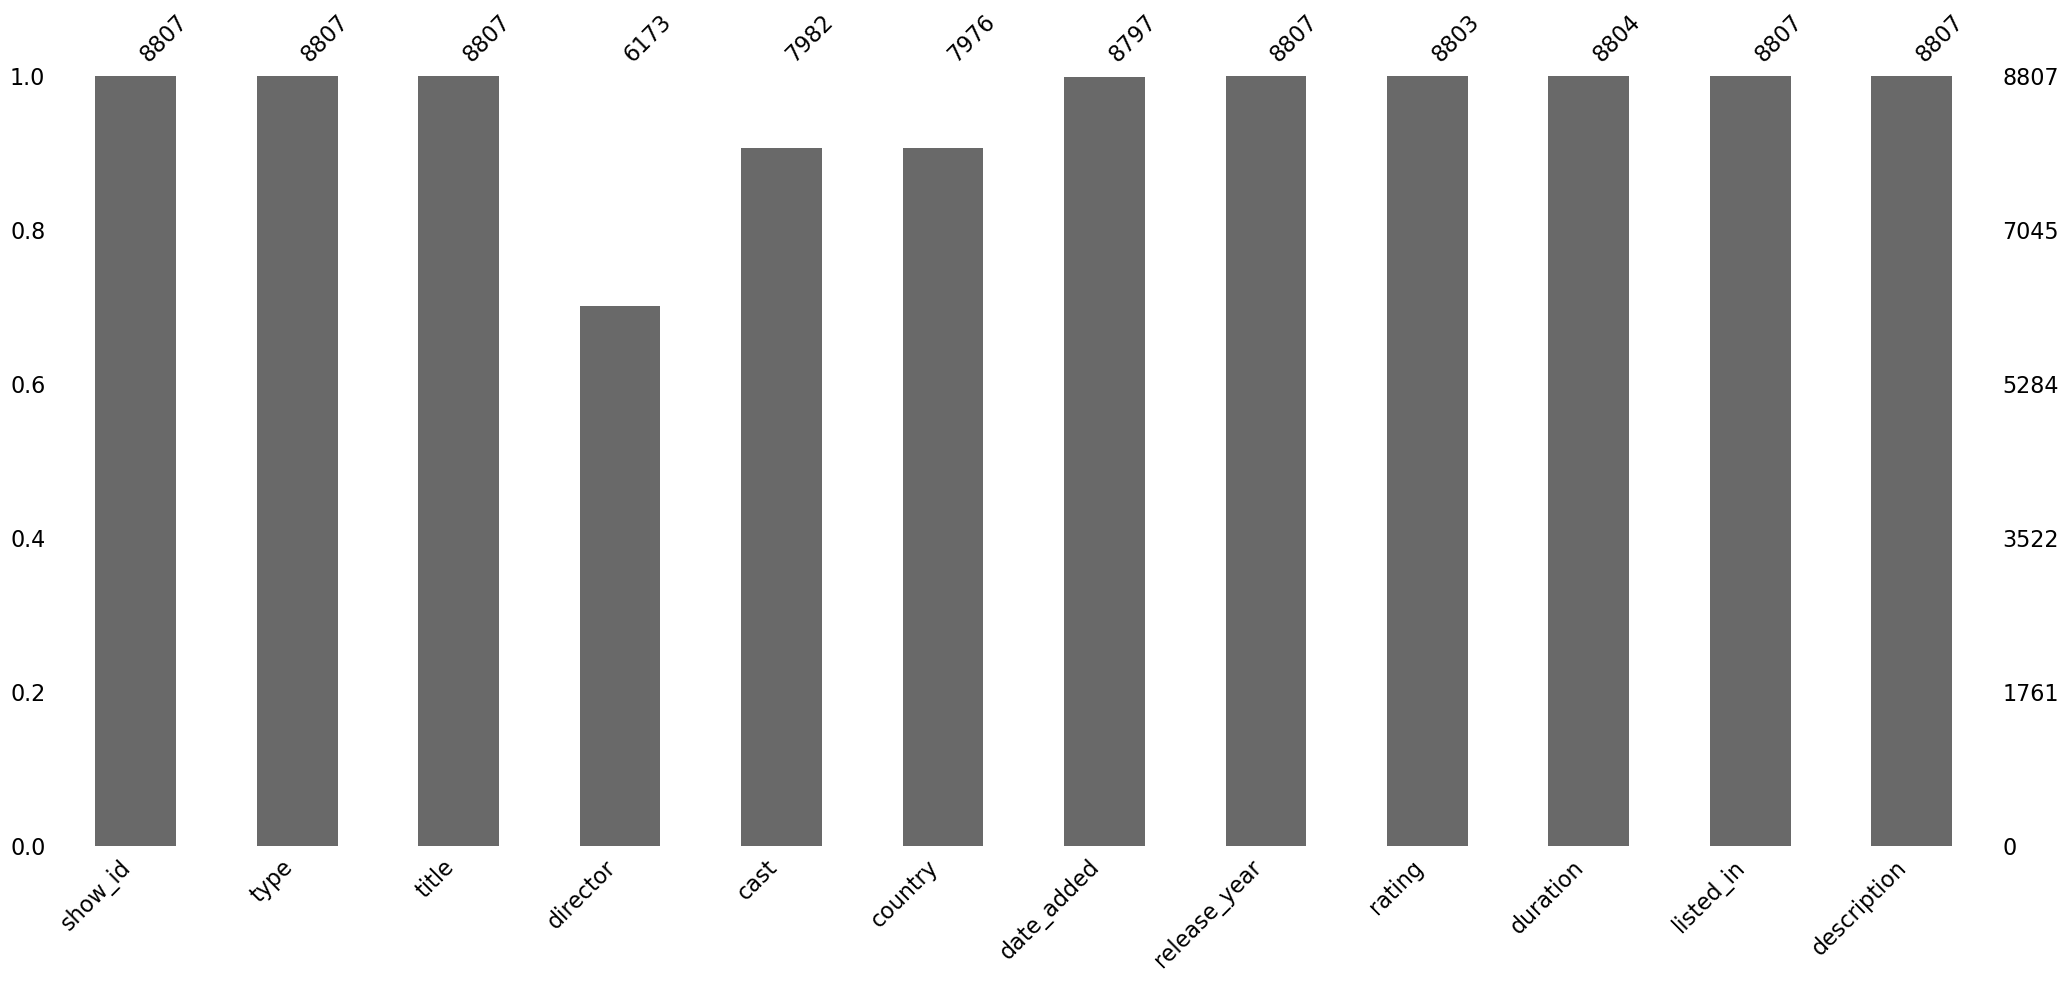

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data
msno.bar(df)
plt.show()


In [ ]:
# Show a random row from the DataFrame
df.sample()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1524,s1525,Movie,Braven,Lin Oeding,"Jason Momoa, Garret Dillahunt, Jill Wagner, St...",Canada,"December 17, 2020",2018,R,94 min,Action & Adventure,A logger defends himself and his family from a...


In [13]:
# Show all info about the title "Catch Me If You Can"
df[df['title'] == 'Catch Me If You Can']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...


In [14]:
# Most recent movie
df[df['type'] == 'Movie'].sort_values(by='release_year', ascending=False).head(1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
570,s571,Movie,Dynasty Warriors,Chow Hin Yeung Roy,"Wang Kai, Louis Koo, Han Geng, Tony Yang, Cari...",NaN,"July 1, 2021",2021,TV-14,118 min,"Action & Adventure, International Movies","Warlords, warriors and statesmen wage a battle..."


In [15]:
# Most recent TV Show
df[df['type'] == 'TV Show'].sort_values(by='release_year', ascending=False).head(1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [19]:
# Convert 'date_added' to datetime, ignoring bad formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Check result
df['date_added'].head()


0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [20]:
# Extract duration in minutes for movies
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Set duration_minutes to None for TV Shows
df.loc[df['type'] != 'Movie', 'duration_minutes'] = None

# Check result
df[['type', 'duration', 'duration_minutes']].head(10)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_18416\1870218618.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)


,type,duration,duration_minutes
0,Movie,90 min,90.0
1,TV Show,2 Seasons,NaN
2,TV Show,1 Season,NaN
3,TV Show,1 Season,NaN
4,TV Show,2 Seasons,NaN
5,TV Show,1 Season,NaN
6,Movie,91 min,91.0
7,Movie,125 min,125.0
8,TV Show,9 Seasons,NaN
9,Movie,104 min,104.0


In [21]:
# Extract duration in seasons for TV Shows
df['duration_seasons'] = df['duration'].str.extract('(\d+)').astype(float)

# Set duration_seasons to None for Movies
df.loc[df['type'] != 'TV Show', 'duration_seasons'] = None

# Check result
df[['type', 'duration', 'duration_seasons']].head(10)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_18416\3449169182.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_seasons'] = df['duration'].str.extract('(\d+)').astype(float)


,type,duration,duration_seasons
0,Movie,90 min,NaN
1,TV Show,2 Seasons,2.0
2,TV Show,1 Season,1.0
3,TV Show,1 Season,1.0
4,TV Show,2 Seasons,2.0
5,TV Show,1 Season,1.0
6,Movie,91 min,NaN
7,Movie,125 min,NaN
8,TV Show,9 Seasons,9.0
9,Movie,104 min,NaN


In [22]:
# Create a new column called 'genres' that stores the genres as a list
df['genres'] = df['listed_in'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
df['genres'].head()


0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genres, dtype: object

In [23]:
# Unique types
print("Unique types:", df['type'].unique())

# Unique ratings
print("\nUnique ratings:", df['rating'].unique())

# Unique countries (first 10 only for brevity)
print("\nUnique countries (first 10):", df['country'].dropna().unique()[:10])


Unique types: ['Movie' 'TV Show']

Unique ratings: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']

Unique countries (first 10): ['United States' 'South Africa' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France']


In [24]:
# Count top 10 directors
top_directors = df['director'].value_counts().head(10)

# Display result
print("Top 10 Directors:")
print(top_directors)


Top 10 Directors:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


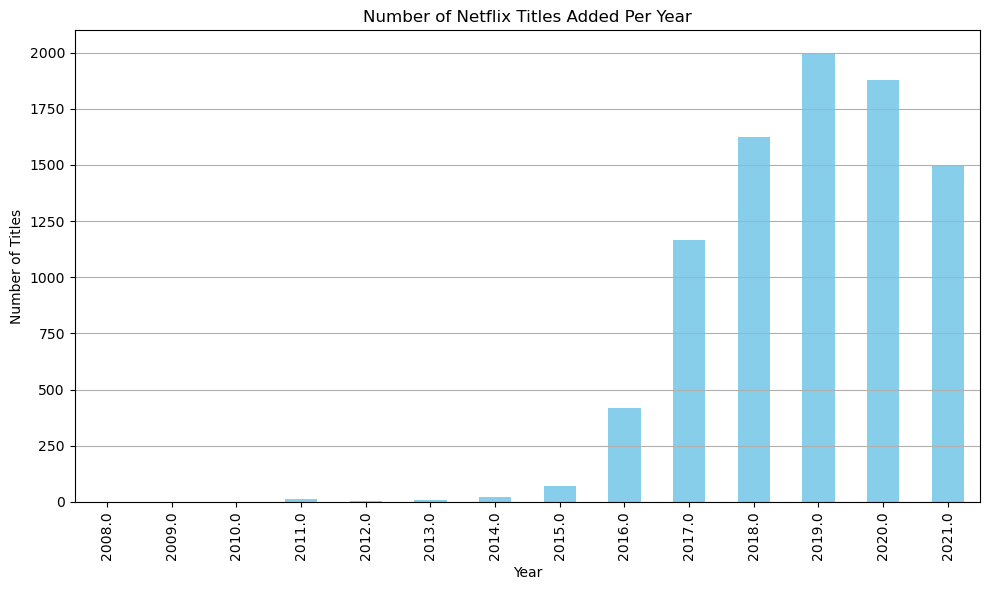

In [25]:
import matplotlib.pyplot as plt

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count titles added per year
titles_per_year = df['year_added'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10,6))
titles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Netflix Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


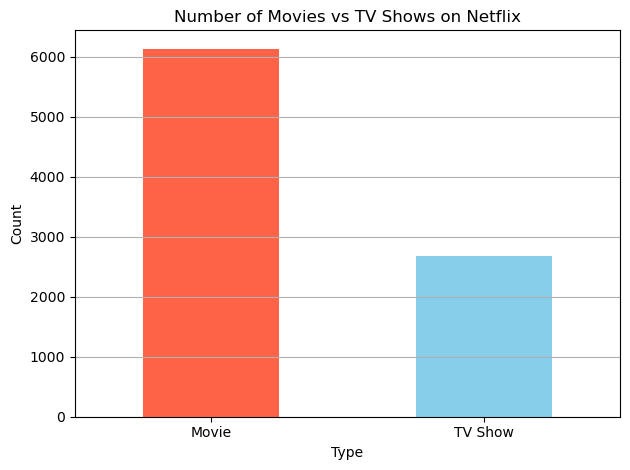

In [26]:
# Count number of Movies vs TV Shows
type_counts = df['type'].value_counts()

# Plot the result
type_counts.plot(kind='bar', color=['tomato', 'skyblue'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


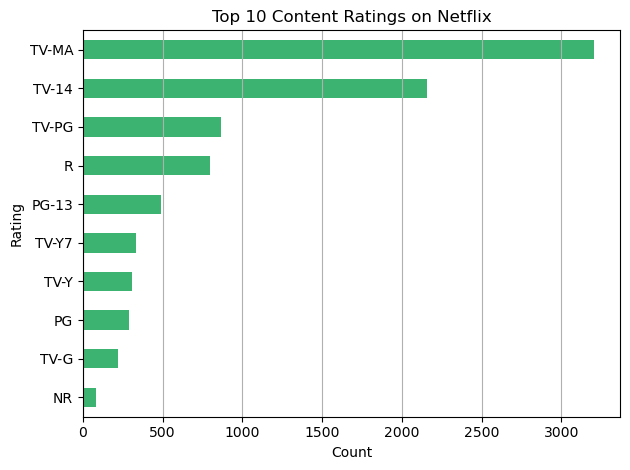

In [27]:
# Count of content by rating
rating_counts = df['rating'].value_counts().head(10)

# Plot the result
rating_counts.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


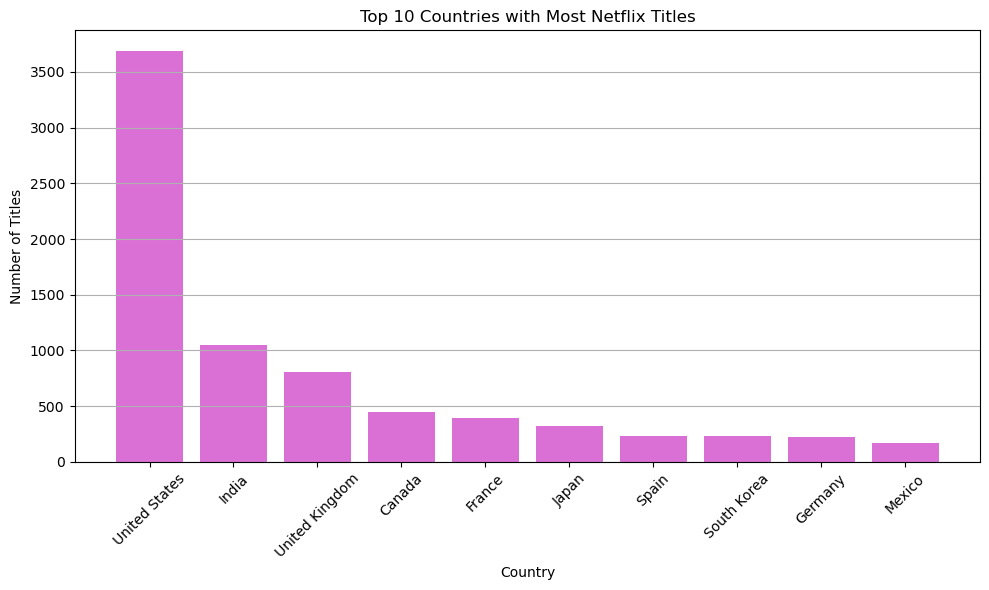

In [28]:
# Drop nulls, split multiple countries, and count them
from collections import Counter

# Clean country column
countries = df['country'].dropna().apply(lambda x: x.split(', '))
all_countries = [country for sublist in countries for country in sublist]

# Count each country
country_counts = Counter(all_countries)

# Get the top 10 countries
top_countries = dict(Counter(all_countries).most_common(10))

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_countries.keys(), top_countries.values(), color='orchid')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Conclusion

In this project, we analyzed the Netflix dataset to explore trends in movies and TV shows. We started with basic data exploration, handled missing values, and cleaned key columns like `date_added`, `duration`, and `listed_in`. 

We discovered:

- The majority of Netflix content is movies.
- The most frequent ratings are TV-MA and TV-14.
- The US, India, and the UK produce the most titles.
- Netflix saw a major spike in content additions in the mid-to-late 2010s.
- Top directors often appear multiple times across the catalog.

This analysis shows how data cleaning and visualization can reveal patterns in entertainment platforms. It also demonstrates the importance of pre-processing and descriptive analysis before applying any machine learning models.

